In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
# Load dataset
file_path = "E:\\BBA\\sem 6\\predictive analytics\\project\\tobacco-usage-youth(2).csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Drop rows with missing values in key columns
df = df.dropna()

# Convert all categorical values to string (to avoid type errors)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future reference

# Convert all numerical columns to proper data types
df = df.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaN values (if any) with median values
df.fillna(df.median(), inplace=True)

In [9]:
print(df.columns)


Index(['State/UT', 'Area', 'Ever tobacco users (%)',
       'Current tobacco users (%)', 'Ever tobacco smokers (%)',
       'Current tobacco smokers (%)', 'Ever cigarette users (%)',
       'Current cigarette users (%)', 'Ever bidi users (%) ',
       'Current bidi users (%)', 'Ever smokeless tobacco users (%)',
       'Current smokeless tobacco users (%)',
       'Ever users of  paan masala together with tobacco (%)',
       'Never cigarette smokers susceptible to cigarette use in future (%)',
       'Median age of initiation of Cigarette (in years)',
       'Median age of initiation of Bidi (in years)',
       'Median age of initiation of smokeless tobacco (in years)',
       'Awareness about e-cigarette (%)', 'Ever e-cigarette use (%)',
       'Ever tobacco smokers who quit in last 12 months (%)',
       'Current tobacco smokers who tried to quit smoking in the past 12 months (%)',
       'Current tobacco smokers who wanted to quit smoking now   (%)',
       'Ever  smokeless tobacco

In [11]:
# Define target variable (e.g., Current tobacco users as 1, Non-users as 0)
target_column = "Current tobacco smokers (%)"  # Choose a suitable column
df[target_column] = (df[target_column] > 0).astype(int)  # Convert to binary

# Define features (excluding non-relevant columns)
features = [
    "Median age of initiation of Cigarette (in years)", 
    "Median age of initiation of Bidi (in years)", 
    "Median age of initiation of smokeless tobacco (in years)", 
    "Awareness about e-cigarette (%)",
    "Exposure to tobacco smoke at home   (%)"  # Ensure exact match
]
X = df[features]
y = df[target_column]


In [12]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [14]:
# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Confusion Matrix:
 [[22]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



C:\Users\Likitha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


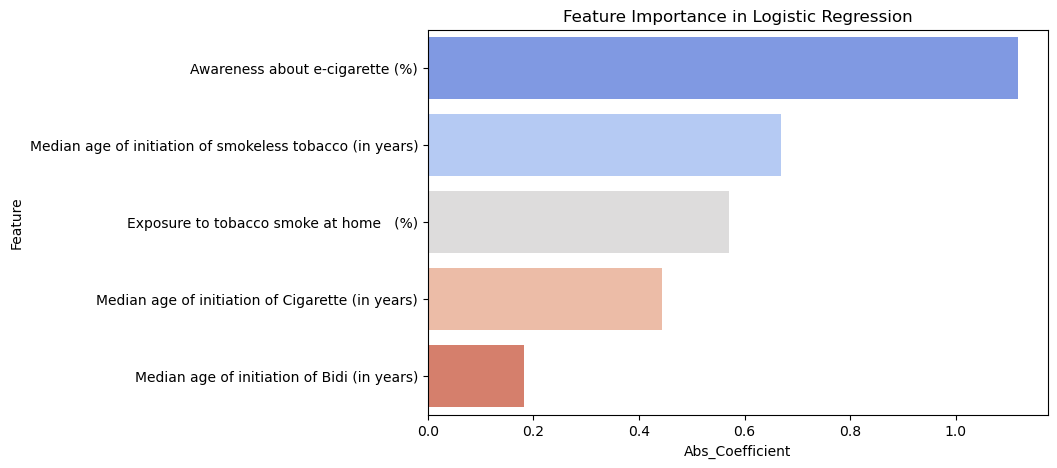

In [16]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({"Feature": features, "Coefficient": log_reg.coef_[0]})
feature_importance["Abs_Coefficient"] = np.abs(feature_importance["Coefficient"])  # Absolute values
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)


# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Abs_Coefficient", y="Feature", data=feature_importance, palette="coolwarm")
plt.title("Feature Importance in Logistic Regression")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Ensure X_train_selected and y_train are defined
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_selected, y_train)  # Train the model

# Get feature importance (absolute coefficient values)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = np.abs(logistic_model.coef_[0])  # Absolute coefficient values
feature_names = X_train_selected.columns  # Ensure these are the correct selected features

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance (Coefficient Magnitude)")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Print the sorted importance values
print(importance_df)


In [8]:
import pandas as pd

# Load dataset
file_path = "E:\\BBA\\sem 6\\predictive analytics\\project\\tobacco usage youth.xls"  # Update with your actual file path
df = pd.read_excel(file_path)

# Quick overview
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 59 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   State/UT                                                                                                                               108 non-null    object 
 1   Area                                                                                                                                   108 non-null    object 
 2   Ever tobacco users (%)                                                                                                                 108 non-null    float64
 3   Current tobacco users (%)                                             

In [9]:
#Step 1: Load and Inspect Data
#This will help us understand column names, data types, and any missing values.

import pandas as pd

# Load dataset
file_path = "E:\\BBA\\sem 6\\predictive analytics\\project\\tobacco usage youth.xls" 
df = pd.read_excel(file_path)


# Display basic info
print("Dataset Info:\n")
print(df.info())

# Show first few rows
print("\nFirst 5 Rows:\n")
print(df.head())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n")
print(df.describe())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 59 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   State/UT                                                                                                                               108 non-null    object 
 1   Area                                                                                                                                   108 non-null    object 
 2   Ever tobacco users (%)                                                                                                                 108 non-null    float64
 3   Current tobacco users (%)                              

In [7]:
#Step 2: Check Unique Values in Categorical Columns
#This helps us understand possible categories in demographic variables.

# Display unique values for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:\n", df[col].unique())



Unique values in State/UT:
 ['India' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haweli' 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jharkhand' 'Karnataka' 'Kerala'
 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']

Unique values in Area:
 ['Total' 'Urban' 'Rural']

Unique values in Median age of initiation of Cigarette (in years):
 [11.5 11.2 11.6 12 12.4 11.8 12.6 12.8 12.5 8.7 7.9 10.9 13.8 10.5 7.7 9.5
 9.9 '--' 8.2 12.1 8 11.1 13.4 9.6 12.3 12.2 7.8 10.6 11.7 11.4 10.8 10.1
 11.3 '<7' 10.4 9.8 11.9 12.7 8.5 8.3 24.2 11 9.3 14.5 9.7 13.1 13.5 9.4 7
 7.1]

Unique values in Median age of initiation of Bidi (in years):
 [10.5 10 10.7 12.3 13.8 11.8 11 14.4 10.8 8.6 8.7 7.9 9.5 13.3 9.4 8.5 8.3
 8.4 9.1

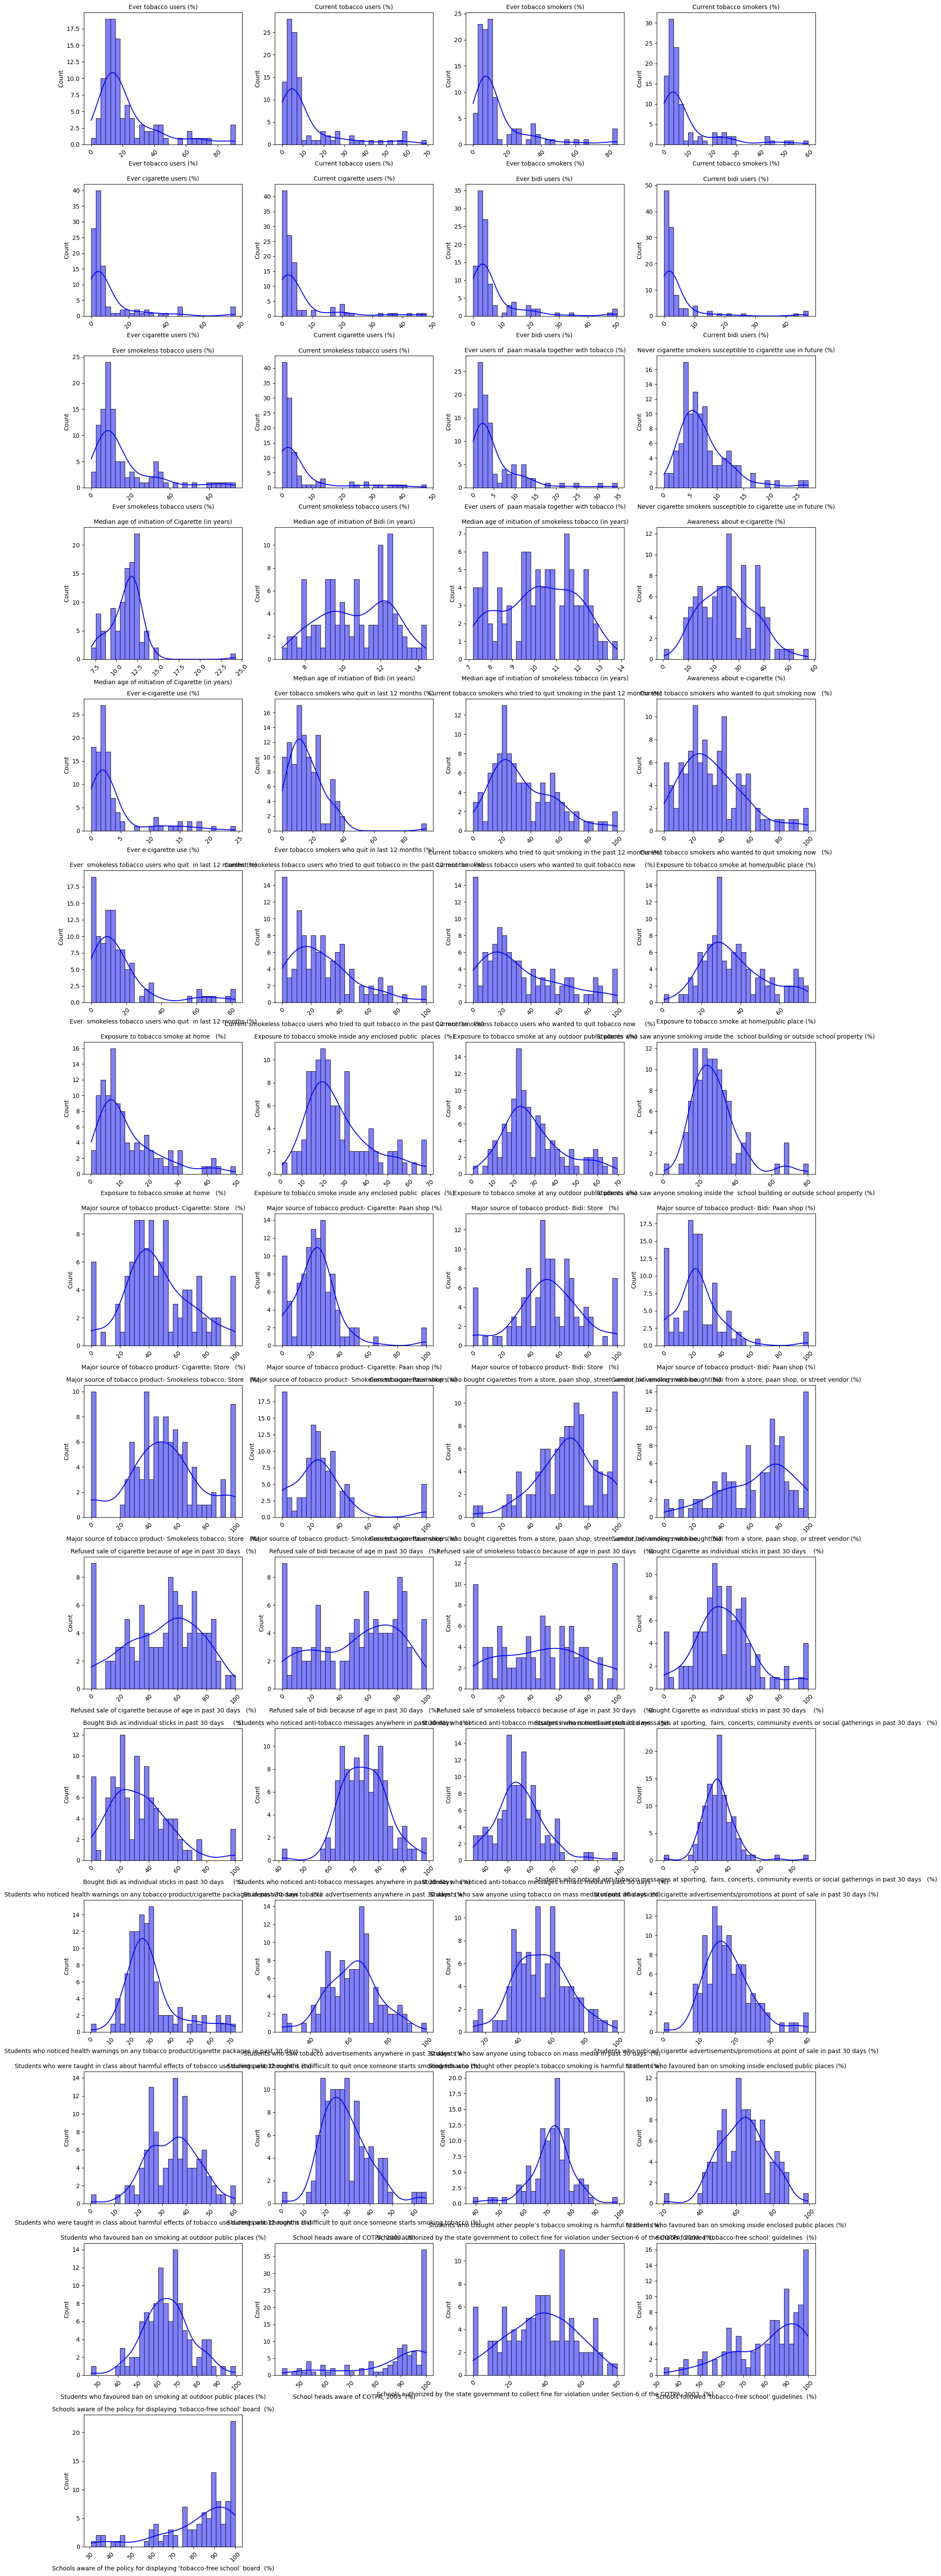

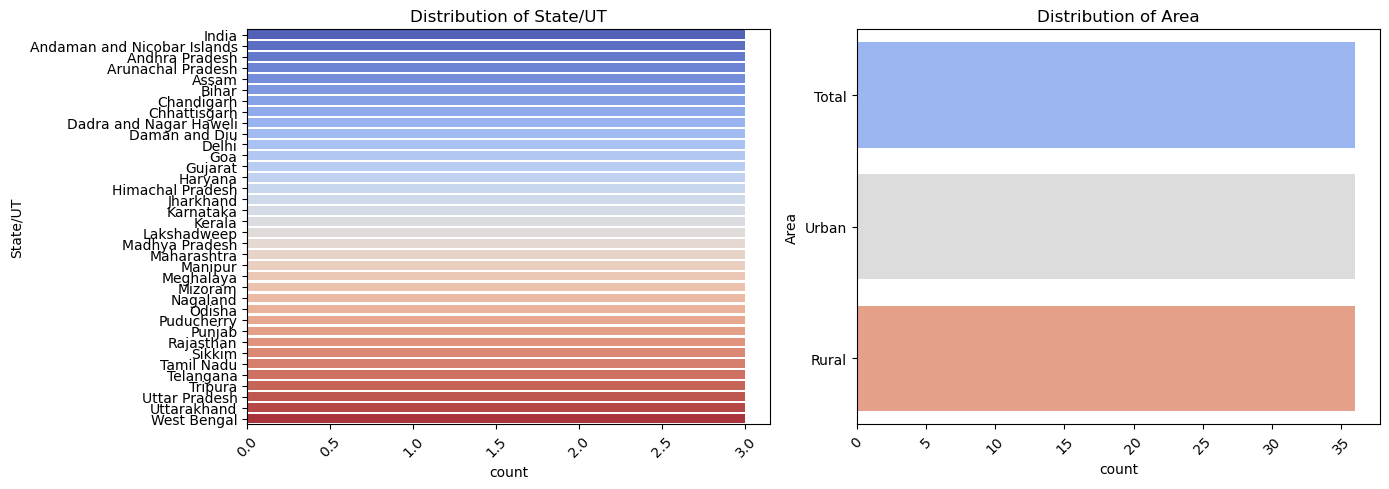

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Separate numeric and categorical columns
df_numeric = df.drop(columns=['State/UT', 'Area'], errors='ignore').apply(pd.to_numeric, errors='coerce')
df_categorical = df[['State/UT', 'Area']]  # Keep categorical columns

# Determine grid size for numeric columns
num_numeric = len(df_numeric.columns)
rows_numeric = int(np.ceil(num_numeric / 4))

# Plot numeric histograms
fig, axes = plt.subplots(rows_numeric, 4, figsize=(18, rows_numeric * 4))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], bins=30, kde=True, color="blue", ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for i in range(num_numeric, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Count plots for categorical columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Adjust size for readability

for i, col in enumerate(df_categorical.columns):
    sns.countplot(y=df_categorical[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


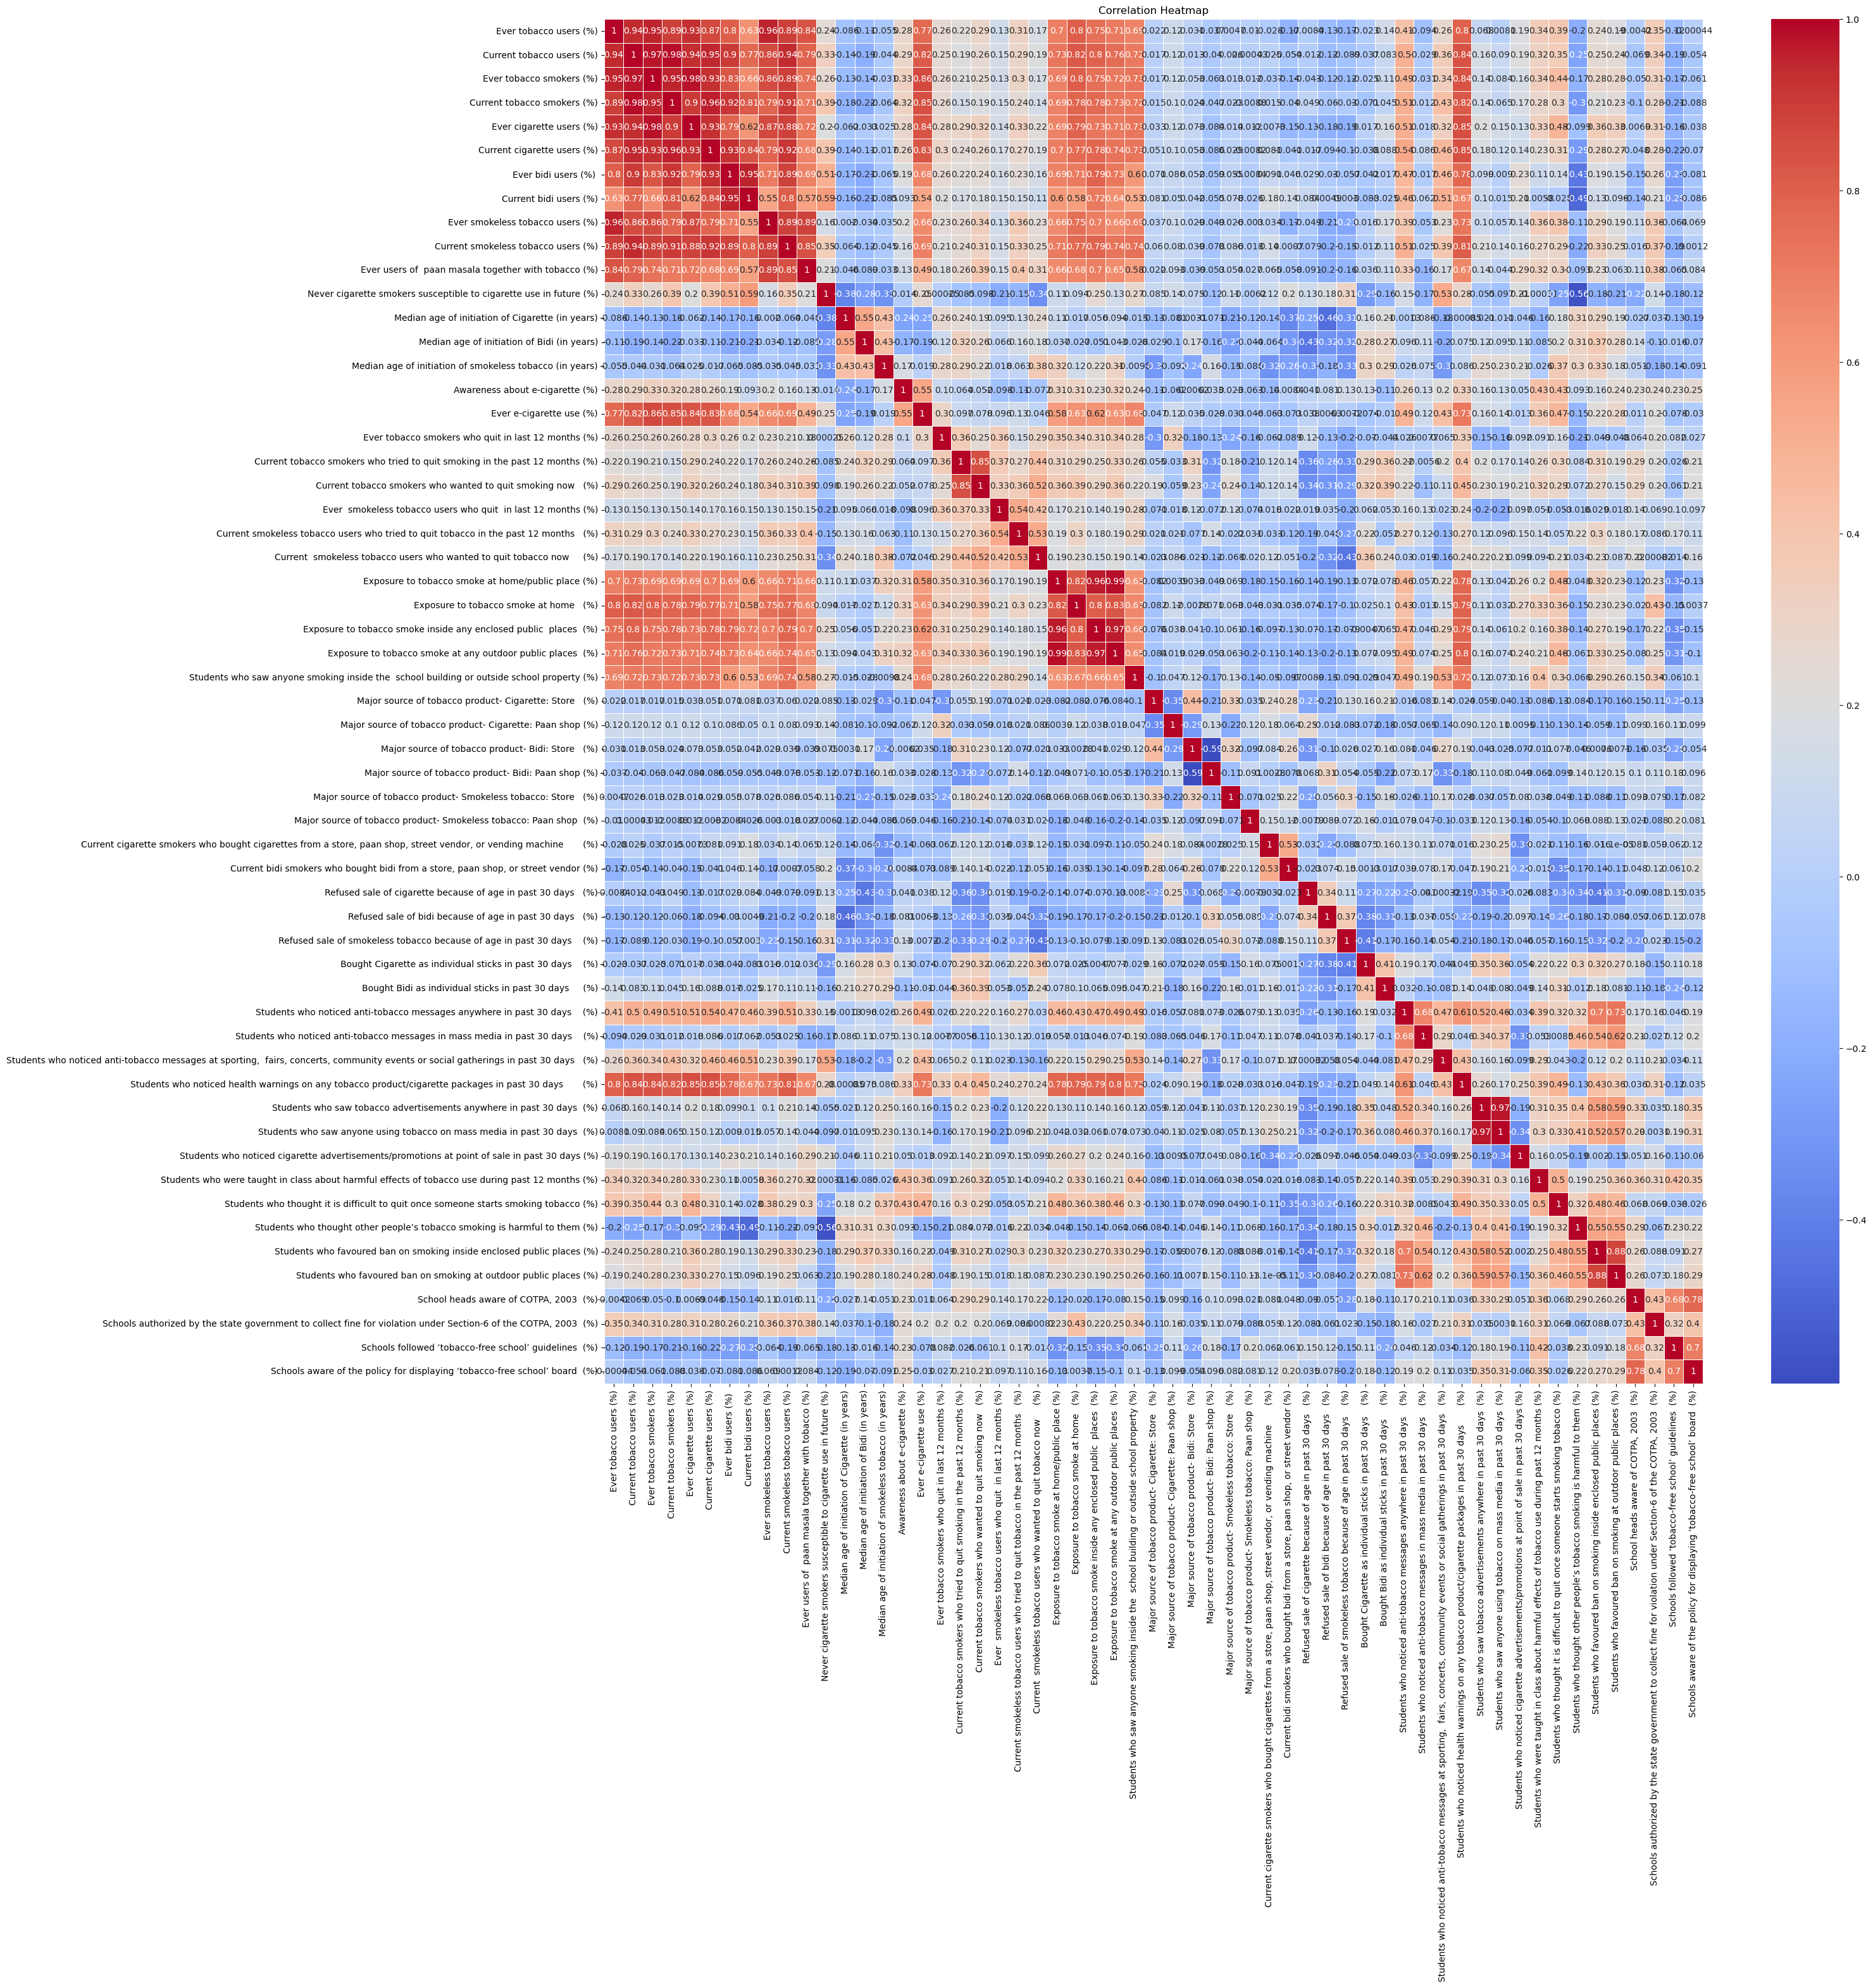

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert percentage columns to numeric (remove non-numeric characters if needed)
df_numeric = df.drop(columns=['State/UT', 'Area'])  # Drop categorical columns

# Ensure all columns are numeric
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Compute correlation
plt.figure(figsize=(28, 28))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder

# 1. Handle Missing Values (Fill NaN with Mean for Numeric Columns)
df_numeric = df.drop(columns=['State/UT', 'Area'], errors='ignore').apply(pd.to_numeric, errors='coerce')
df_numeric.fillna(df_numeric.mean(), inplace=True)

# 2. Convert Percentage Columns to Decimal (if needed)
df_numeric = df_numeric / 100  # Convert 0-100% values into 0-1 range

# 3. Encode Categorical Variables
df_processed = df.copy()
label_encoders = {}

for col in ['State/UT', 'Area']:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le  # Store encoders for later use

# 4. Replace Processed Numeric Columns
for col in df_numeric.columns:
    df_processed[col] = df_numeric[col]

# 5. Display Processed Data
print("\nProcessed Data Sample:\n", df_processed.head())
print("\nMissing Values After Processing:\n", df_processed.isnull().sum().sum())



Processed Data Sample:
    State/UT  Area  Ever tobacco users (%)  Current tobacco users (%)  \
0        14     1                   0.181                      0.085   
1        14     2                   0.135                      0.055   
2        14     0                   0.195                      0.094   
3         0     1                   0.215                      0.044   
4         0     2                   0.133                      0.034   

   Ever tobacco smokers (%)  Current tobacco smokers (%)  \
0                     0.110                        0.073   
1                     0.081                        0.045   
2                     0.118                        0.081   
3                     0.088                        0.037   
4                     0.065                        0.026   

   Ever cigarette users (%)  Current cigarette users (%)  \
0                     0.046                        0.026   
1                     0.041                        0.023   
2

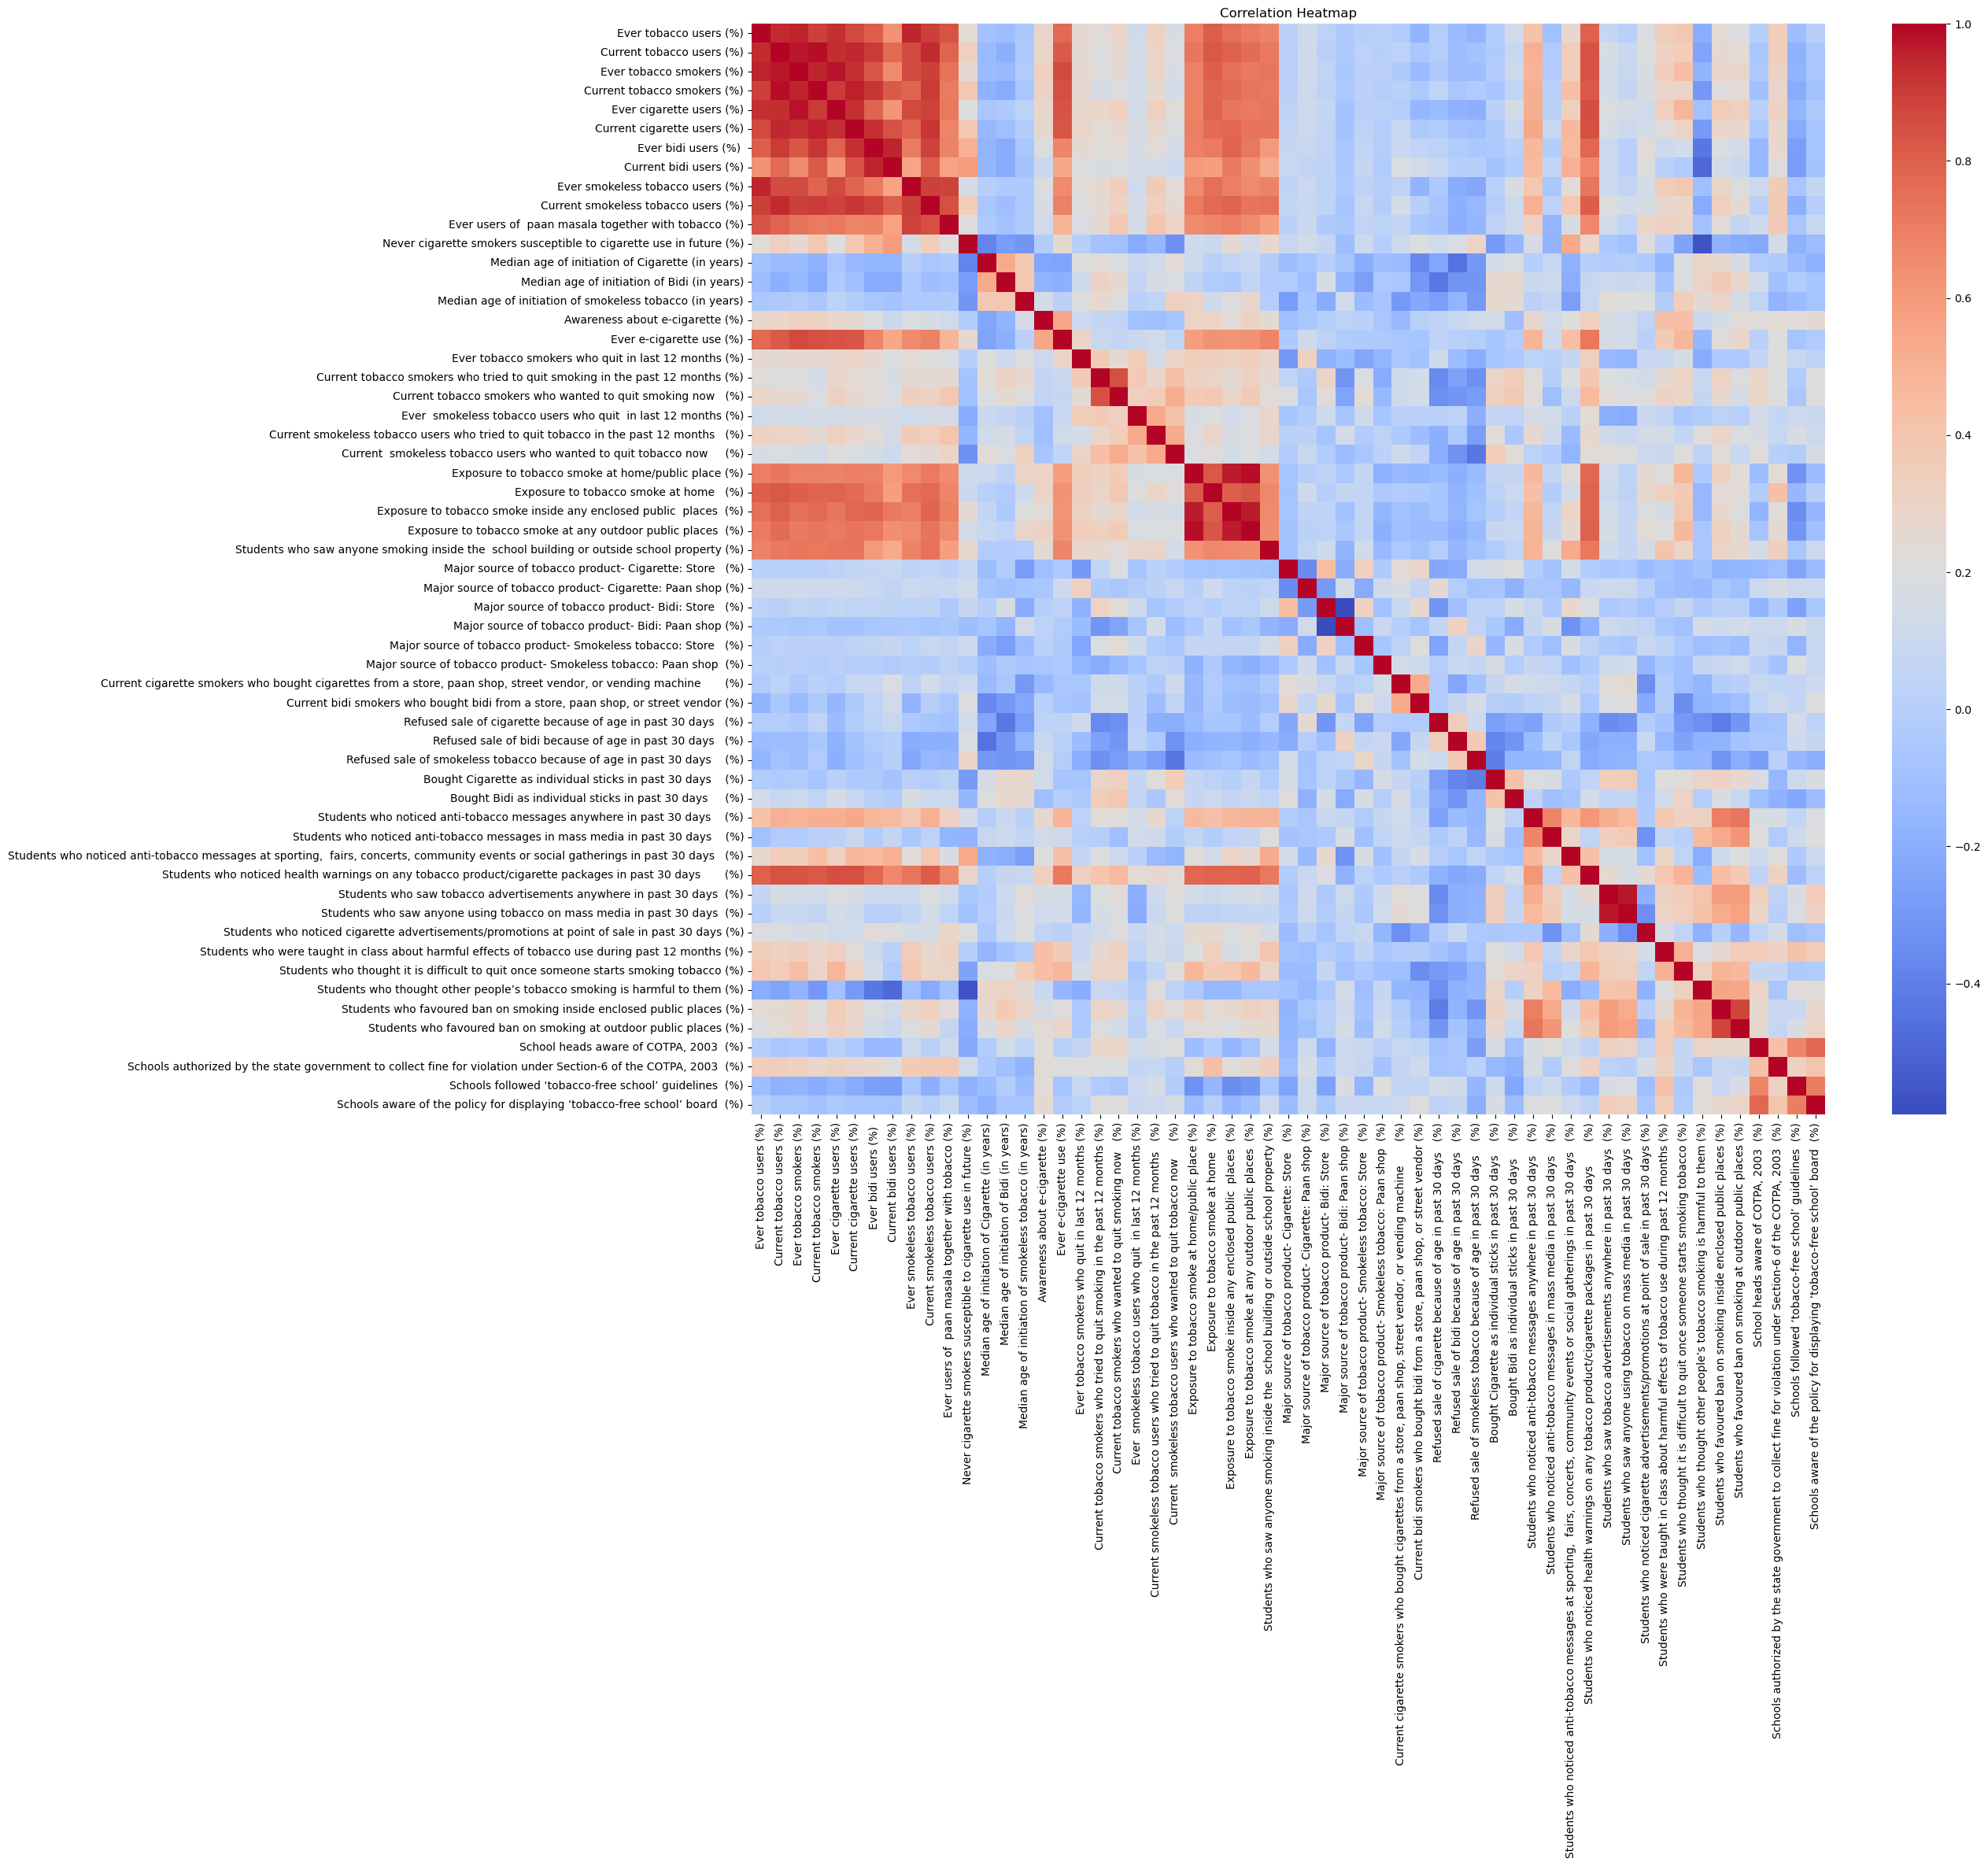

Highly Correlated Features to Drop: ['Current tobacco users (%)', 'Ever tobacco smokers (%)', 'Current tobacco smokers (%)', 'Ever cigarette users (%)', 'Current cigarette users (%)', 'Ever bidi users (%) ', 'Current bidi users (%)', 'Ever smokeless tobacco users (%)', 'Current smokeless tobacco users (%)', 'Ever users of  paan masala together with tobacco (%)', 'Ever e-cigarette use (%)', 'Current tobacco smokers who wanted to quit smoking now   (%)', 'Exposure to tobacco smoke inside any enclosed public  places  (%)', 'Exposure to tobacco smoke at any outdoor public places  (%)', 'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)', 'Students who saw anyone using tobacco on mass media in past 30 days  (%)', 'Students who favoured ban on smoking at outdoor public places (%)']
Selected Categorical Features: ['State/UT']

Top 10 Most Important Features:
 Ever tobacco users (%)                                                          

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

# 1. Correlation Analysis (Remove Highly Correlated Features)
plt.figure(figsize=(22, 18))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Identify highly correlated features (Threshold: 0.85)
corr_threshold = 0.85
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)]
print(f"Highly Correlated Features to Drop: {high_corr_features}")

df_selected = df_numeric.drop(columns=high_corr_features, errors='ignore')

# 2. Chi-Square Test for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer

# Select categorical features
X_cat = df_processed[['State/UT', 'Area']].apply(lambda x: x.astype('category').cat.codes)  # Encode categories

y = df_processed['Current tobacco users (%)']

# Convert y into categorical bins (e.g., Low, Medium, High)
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')  # Binning into 3 categories
y_binned = kbins.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

# Apply Chi-Square Test
chi2_selector = SelectKBest(chi2, k=1)
X_cat_selected = chi2_selector.fit_transform(X_cat, y_binned)

# Print selected categorical features
selected_categorical_features = np.array(['State/UT', 'Area'])[chi2_selector.get_support()]
print(f"Selected Categorical Features: {selected_categorical_features}")




# 3. Feature Importance from Logistic Regression
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_scaled, (y > y.mean()).astype(int))  # Convert y into binary classes

# Feature Importance
feature_importance = pd.Series(log_reg.coef_[0], index=df_selected.columns)
top_features = feature_importance.abs().sort_values(ascending=False).head(10)  # Select Top 10 Features

print("\nTop 10 Most Important Features:\n", top_features)

# Final Selected Features
selected_features = list(top_features.index) + list(selected_categorical_features)
df_final = df_processed[selected_features + ['Current tobacco users (%)']]  # Keep target variable
print("\nFinal Selected Features:\n", df_final.columns)


In [13]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Extract only numerical features (excluding categorical ones)
X_num = df_processed.select_dtypes(include=['number'])

# Apply SelectKBest for numerical features (using f_regression for regression problems)
k = min(5, X_num.shape[1])  # Ensure k is not greater than available features
selector = SelectKBest(f_regression, k=k)
X_num_selected = selector.fit_transform(X_num, y)

# Get the selected feature names
selected_numerical_features = np.array(X_num.columns)[selector.get_support()]

# Print selected numerical features
print("Selected Numerical Features:", selected_numerical_features)


Selected Numerical Features: ['Ever tobacco users (%)' 'Ever tobacco smokers (%)'
 'Current tobacco smokers (%)' 'Current cigarette users (%)'
 'Current smokeless tobacco users (%)']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define selected features
selected_features = list(selected_numerical_features) + list(selected_categorical_features)

# Define X and y
X = df_processed[selected_features]
y = df_processed['Current tobacco users (%)']  # Target variable

# Convert y into binary classes (smoking vs. non-smoking threshold)
y_binary = (y > y.median()).astype(int)  # 1 = High tobacco usage, 0 = Low tobacco usage

# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Preprocessing pipeline (scaling numerical, encoding categorical)
numeric_features = selected_numerical_features
categorical_features = selected_categorical_features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical
    ])

# Build pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.91      0.83      0.87        12

    accuracy                           0.86        22
   macro avg       0.86      0.87      0.86        22
weighted avg       0.87      0.86      0.86        22



In [17]:
!pip install xgboost


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    print(f"\n🔹 Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


In [19]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(selected_features)


['Ever tobacco users (%)', 'Ever tobacco smokers (%)', 'Current tobacco smokers (%)', 'Current cigarette users (%)', 'Current smokeless tobacco users (%)', 'State/UT']


In [20]:
print(X_train_selected.head())  # Check if it's properly created
print(X_test_selected.head())


    Ever tobacco users (%)  Ever tobacco smokers (%)  \
64                   0.430                     0.239   
26                   0.192                     0.045   
22                   0.174                     0.139   
31                   0.165                     0.118   
47                   0.270                     0.098   

    Current tobacco smokers (%)  Current cigarette users (%)  \
64                        0.110                        0.106   
26                        0.022                        0.011   
22                        0.073                        0.037   
31                        0.077                        0.028   
47                        0.039                        0.011   

    Current smokeless tobacco users (%)  State/UT  
64                                0.093        21  
26                                0.009         7  
22                                0.015         6  
31                                0.012         9  
47                

In [21]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_selected, y_train)  # Training the model
    y_pred = model.predict(X_test_selected)  # Making predictions

    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



🔹 Model: SVM
Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.33      0.50        12

    accuracy                           0.64        22
   macro avg       0.78      0.67      0.61        22
weighted avg       0.80      0.64      0.60        22


🔹 Model: Random Forest
Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.92      0.92      0.92        12

    accuracy                           0.91        22
   macro avg       0.91      0.91      0.91        22
weighted avg       0.91      0.91      0.91        22


🔹 Model: XGBoost
Accuracy: 0.8636363636363636
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.91      0.83      0.87        12

    accuracy                           

C:\Users\Likitha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

# Initialize models
svm = SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()

# Perform GridSearchCV
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit models
print("Tuning SVM...")
grid_svm.fit(X_train_selected, y_train)

print("Tuning Random Forest...")
grid_rf.fit(X_train_selected, y_train)

print("Tuning XGBoost...")
grid_xgb.fit(X_train_selected, y_train)

# Print best parameters and best score
print("\nBest SVM Parameters:", grid_svm.best_params_)
print("Best SVM Accuracy:", grid_svm.best_score_)

print("\nBest RF Parameters:", grid_rf.best_params_)
print("Best RF Accuracy:", grid_rf.best_score_)

print("\nBest XGB Parameters:", grid_xgb.best_params_)
print("Best XGB Accuracy:", grid_xgb.best_score_)


Tuning SVM...
Tuning Random Forest...
Tuning XGBoost...

Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.8143790849673203

Best RF Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best RF Accuracy: 0.930718954248366

Best XGB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best XGB Accuracy: 0.9307189542483659


In [23]:
# Train models with best parameters
best_svm = SVC(**grid_svm.best_params_)
best_rf = RandomForestClassifier(**grid_rf.best_params_)
best_xgb = XGBClassifier(**grid_xgb.best_params_)

# Fit models
best_svm.fit(X_train_selected, y_train)
best_rf.fit(X_train_selected, y_train)
best_xgb.fit(X_train_selected, y_train)

# Predictions
y_pred_svm = best_svm.predict(X_test_selected)
y_pred_rf = best_rf.predict(X_test_selected)
y_pred_xgb = best_xgb.predict(X_test_selected)

# Evaluate models
print("\n🔹 Support Vector Machine (SVM):")
print(classification_report(y_test, y_pred_svm))

print("\n🔹 Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

print("\n🔹 XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))



🔹 Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.80      0.67      0.73        12

    accuracy                           0.73        22
   macro avg       0.73      0.73      0.73        22
weighted avg       0.74      0.73      0.73        22


🔹 Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.92      0.92      0.92        12

    accuracy                           0.91        22
   macro avg       0.91      0.91      0.91        22
weighted avg       0.91      0.91      0.91        22


🔹 XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.91      0.83      0.87        12

    accuracy                           0.86        22
   macro avg       0.86      0.87      0.86

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure the logistic regression model is trained
if 'logistic_model' in locals() or 'logistic_model' in globals():
    # Get feature importance (absolute value of coefficients)
    feature_importance = np.abs(logistic_model.coef_[0])  
    feature_names = X_train_selected.columns  # Ensure these are the correct selected feature names

    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 5))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel("Importance (Coefficient Magnitude)")
    plt.ylabel("Feature")
    plt.title("Feature Importance in Logistic Regression")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()

    # Print the sorted importance values
    print(importance_df)
else:
    print("Error: Logistic Regression model ('logistic_model') is not defined.")


Error: Logistic Regression model ('logistic_model') is not defined.


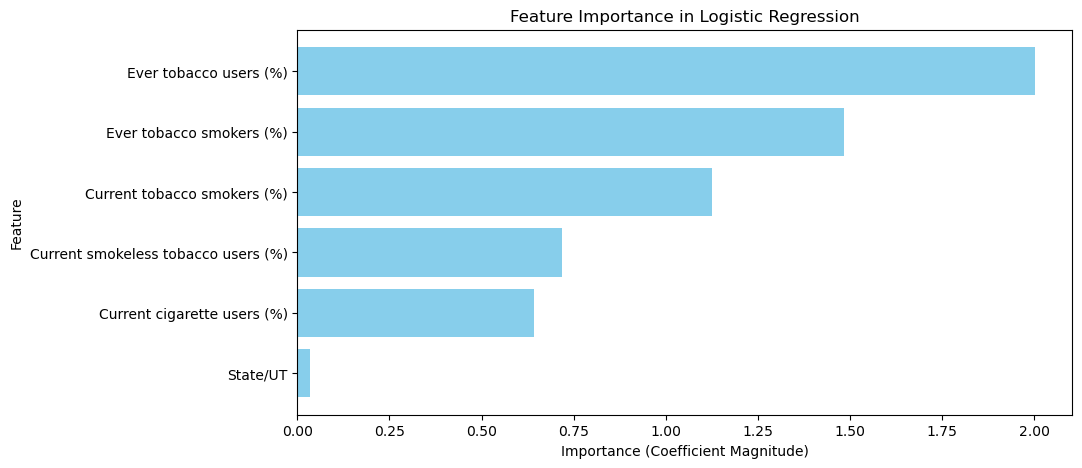

                               Feature  Importance
0               Ever tobacco users (%)    2.003643
1             Ever tobacco smokers (%)    1.484953
2          Current tobacco smokers (%)    1.126467
4  Current smokeless tobacco users (%)    0.717588
3          Current cigarette users (%)    0.641161
5                             State/UT    0.033188


In [24]:
from sklearn.linear_model import LogisticRegression

# Ensure X_train_selected and y_train are defined
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_selected, y_train)  # Train the model

# Get feature importance (absolute coefficient values)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = np.abs(logistic_model.coef_[0])  # Absolute coefficient values
feature_names = X_train_selected.columns  # Ensure these are the correct selected features

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance (Coefficient Magnitude)")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Print the sorted importance values
print(importance_df)


In [40]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_selected, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test_selected)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score

logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"🔹 Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


🔹 Logistic Regression Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.58      0.74        12

    accuracy                           0.77        22
   macro avg       0.83      0.79      0.77        22
weighted avg       0.85      0.77      0.77        22



In [25]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(logistic_model, "logistic_regression_tobacco_model.pkl")

print("Logistic Regression model saved successfully!")


Logistic Regression model saved successfully!


In [26]:
# Load the saved Logistic Regression model
loaded_model = joblib.load("logistic_regression_tobacco_model.pkl")

# Example: Making predictions on new data
new_predictions = loaded_model.predict(X_test_selected)
print("Predictions on test data:", new_predictions)


Predictions on test data: [1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0]


In [45]:
pip install panel pandas numpy matplotlib seaborn scikit-learn


Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Matplotlib(Figure)
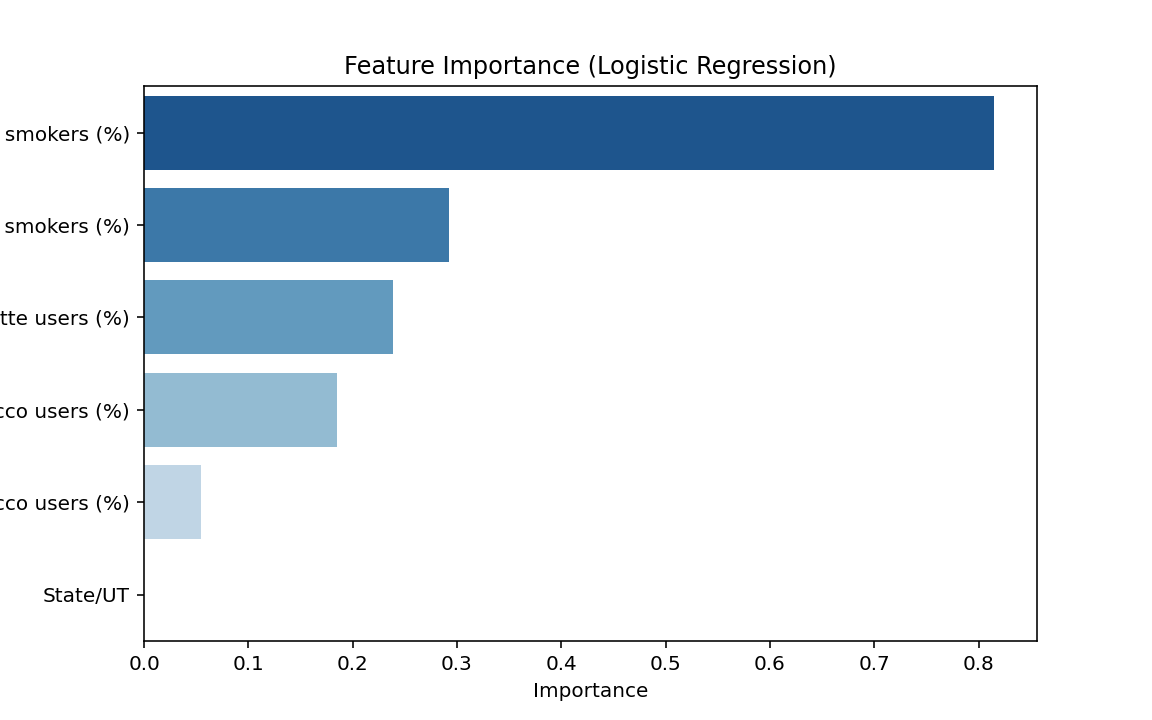

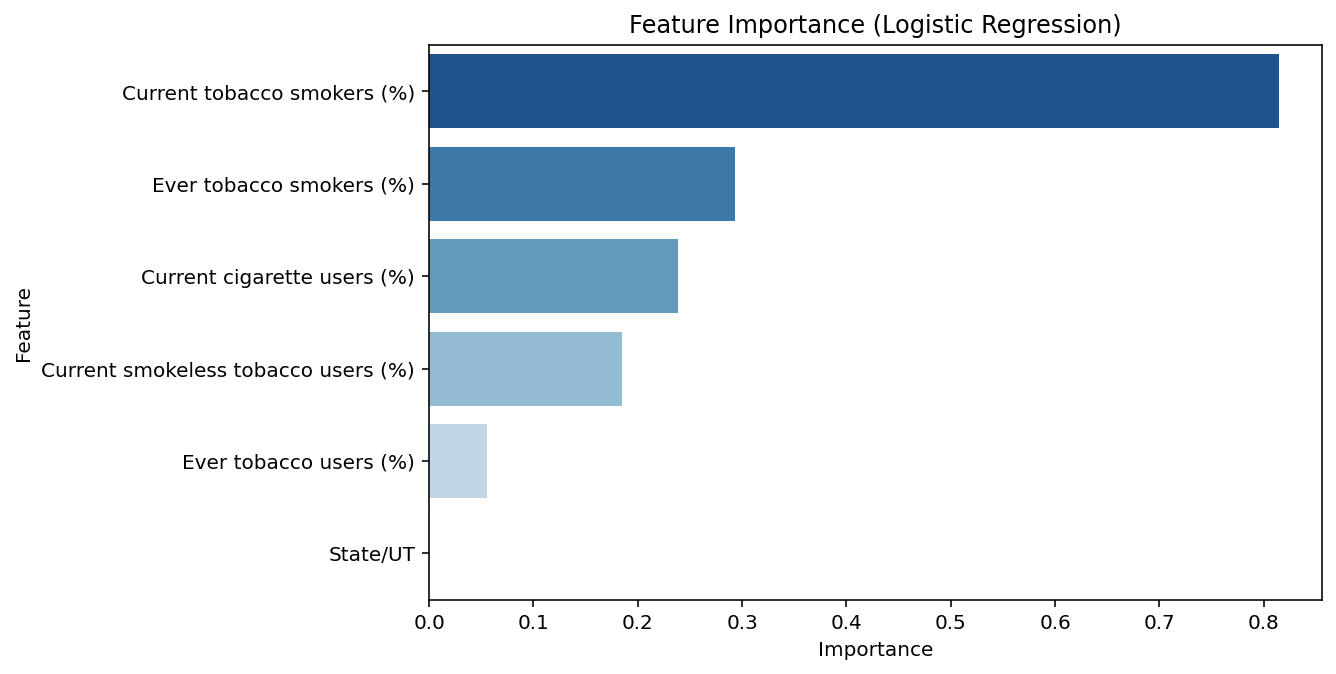

In [27]:
import panel as pn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Enable Panel extensions
pn.extension()

# Sample Data (Replace with actual dataset)
data = pd.DataFrame({
    'Ever tobacco users (%)': np.random.rand(100),
    'Ever tobacco smokers (%)': np.random.rand(100),
    'Current tobacco smokers (%)': np.random.rand(100),
    'Current cigarette users (%)': np.random.rand(100),
    'Current smokeless tobacco users (%)': np.random.rand(100),
    'State/UT': np.random.randint(1, 30, 100),
    'Target': np.random.randint(0, 2, 100)  # Binary classification target
})

# Splitting data
X = data.drop(columns=['Target'])
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Feature Importance
feature_importance = abs(logistic_model.coef_[0])
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
def plot_feature_importance():
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=feature_df, palette='Blues_r')
    plt.title('Feature Importance (Logistic Regression)')
    return plt.gcf()



# Dashboard Layout
accuracy_widget = pn.pane.Markdown(f'### Model Accuracy: {accuracy:.2f}')

# Generate the feature importance plot and retrieve the figure
fig = plot_feature_importance()  # Ensure this function returns a `matplotlib.figure.Figure`

# Pass the generated figure to Panel
feature_plot = pn.pane.Matplotlib(fig)


dashboard = pn.Column(
    "# Youth Tobacco Usage Prediction Dashboard",
    accuracy_widget,
    "## Feature Importance",
    feature_plot
)

# Show dashboard
dashboard.servable()


In [28]:
sample_data = np.array([[0.30, 0.15, 0.10, 0.05, 0.03, 10]])  # Example feature values
prediction = logistic_model.predict(sample_data)
print("Predicted Tobacco Usage:", "User" if prediction[0] == 1 else "Non-User")


Predicted Tobacco Usage: User


C:\Users\Likitha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [4]:
sample_data = np.array([[0.05, 0.02, 0.01, 0.00, 0.01, 18]])  # Example feature values
prediction = logistic_model.predict(sample_data)
print("Predicted Tobacco Usage:", "User" if prediction[0] == 1 else "Non-User")


Predicted Tobacco Usage: Non-User


C:\Users\Likitha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
